In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
import os


In [7]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'validation')

IMG_HEIGHT, IMG_WIDTH = 150, 150
BATCH_SIZE = 32


68606236/68606236 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [8]:
# 3
# ImageDataGenerators
train_image_generator = ImageDataGenerator(rescale=1.0/255.0)
validation_image_generator = ImageDataGenerator(rescale=1.0/255.0)
test_image_generator = ImageDataGenerator(rescale=1.0/255.0)

# Flow from directory
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

validation_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size= BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


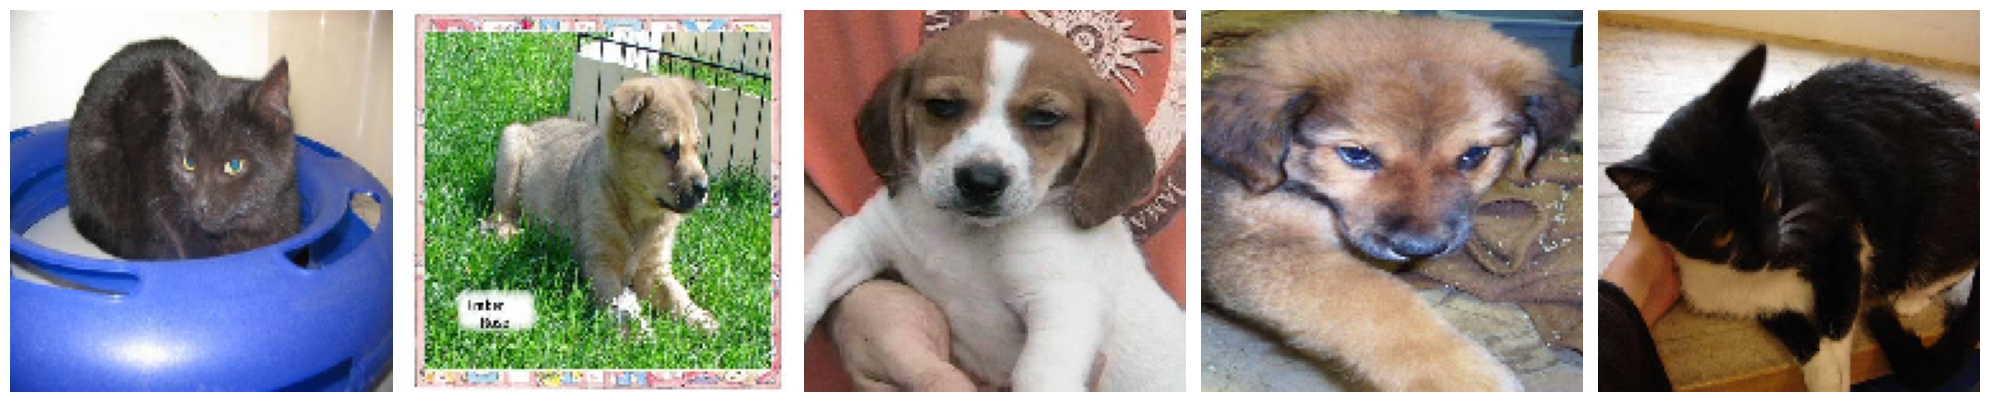

In [9]:
#4
def plotImages(images_arr, probabilities=None):
    fig, axes = plt.subplots(1, 5, figsize=(20, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [10]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


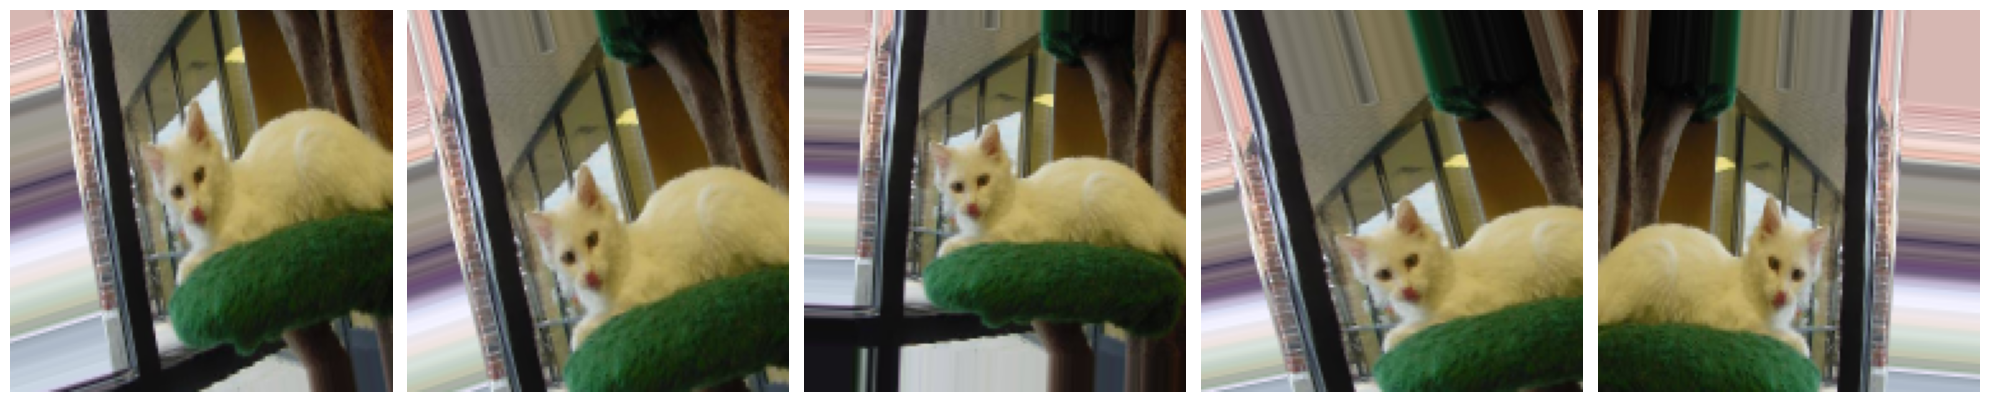

In [11]:
# 6
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)


In [12]:
# 7
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# 8
EPOCHS = 10

history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=EPOCHS,
    validation_data=validation_data_gen,
    validation_steps=len(validation_data_gen)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4900 - loss: 0.8662 - val_accuracy: 0.5040 - val_loss: 0.6919
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5103 - loss: 0.6933 - val_accuracy: 0.5240 - val_loss: 0.6917
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.5480 - loss: 0.6904 - val_accuracy: 0.5140 - val_loss: 0.6924
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 244us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - accuracy: 0.5323 - loss: 0.6902 - val_accuracy: 0.5460 - val_loss: 0.6845
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.5459 - loss: 0.6872 - val_accuracy: 0.5530 - val_loss: 0.6796
Epoch 10/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


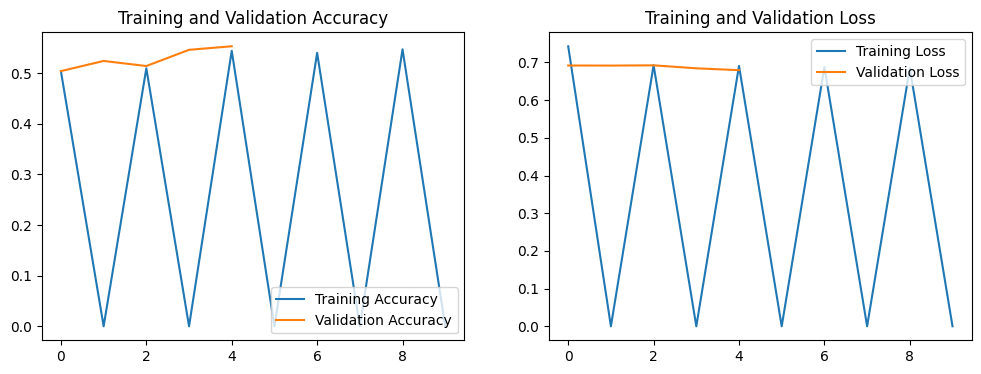

In [16]:
#9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(loss))
val_epochs_range = range(len(val_loss))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc[:len(epochs_range)], label='Training Accuracy')
plt.plot(val_epochs_range, val_acc[:len(val_epochs_range)], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(val_epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 509ms/step


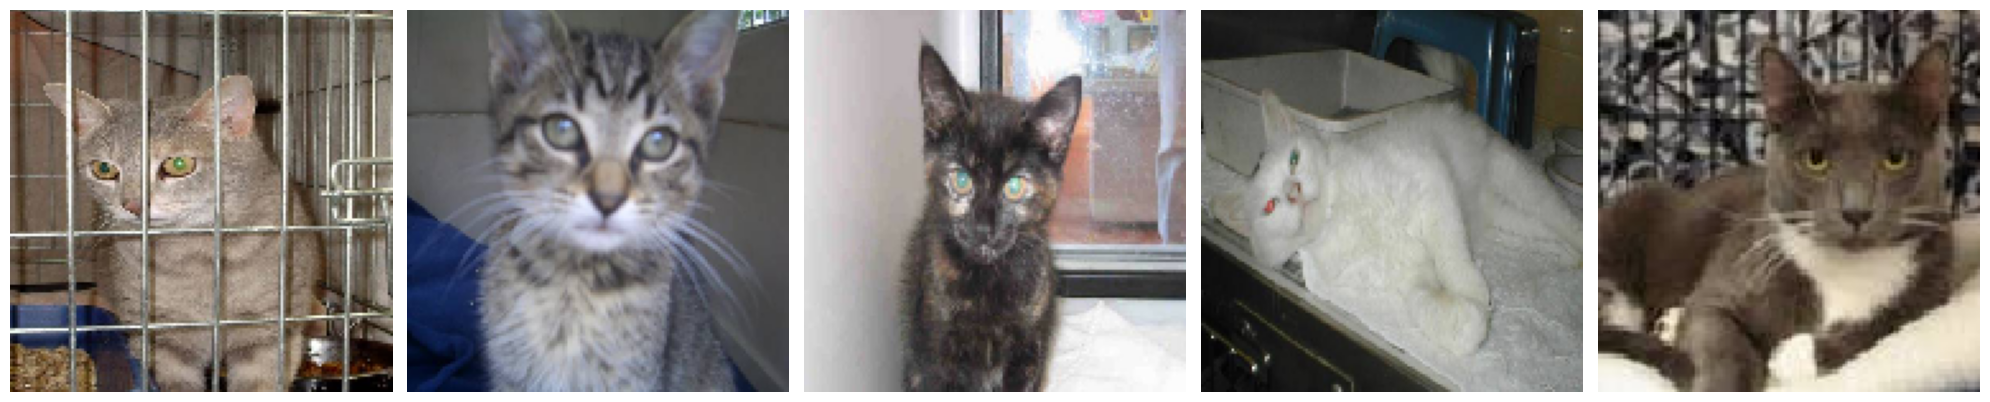

In [19]:
#10

probabilities = model.predict(test_data_gen)
probabilities = [1 if prob > 0.5 else 0 for prob in probabilities]

test_images = next(test_data_gen)
plotImages(test_images[:5], probabilities[:5])


In [20]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 50.0% of the images of cats and dogs.
You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!
